In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
file2 = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\plot madrid\all_Madrid.xlsx"

xl2= pd.ExcelFile(file2)      # Load spreadsheet
df2 = xl2.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df2.index  = np.arange(len(df2))
df=df2

In [3]:
v=[]
for i in df['mod']:
    if math.isnan(i) is True:
        v.append('-')
    elif i==1:
        v.append('No information')
    elif i==2:
        v.append('Congestion and pollution')
    elif i==3:
        v.append('Public services')
    elif i==4:
        v.append('Redistribution')
df.insert(loc=1, column='Treatment', value=v)
#df.drop(['mod'], inplace=True, axis=1)
df=df.rename(columns={"player.HH": "High EE High NE","player.HL": "High EE Low NE", "player.LH": "Low EE High NE","player.LL": "Low EE Low NE"})

In [4]:
z=df
a=df
b=df
c=df
d=df
for i in range(len(df)):
    if z['Treatment'][i]!='No information':
        a=a.drop(i)
    if z['Treatment'][i]!='Congestion and pollution':
        b=b.drop(i)
    if z['Treatment'][i]!='Public services':
        c=c.drop(i)
    if z['Treatment'][i]!='Redistribution':
        d=d.drop(i)

In [5]:
len(a),len(b),len(c),len(d)

(42, 40, 48, 51)

In [6]:
def bar1(d):
    d.index  = np.arange(len(d))
    x=pd.DataFrame( index=[0,1])
    for i in [237,239,241,243]:
        column= d.columns[i]
        aa=d.groupby([column]).count()['mod']
        per=0
        s=0
        dev=0
        for j in aa.index:
            per=per+j*aa[j]
            s=s+aa[j]
        x.at[0,column] = per/s
        for j in aa.index:  
            dev=dev+(aa[j]*(j-x.at[0,column])**2)
        x.at[1,column] = np.sqrt(dev/s)
        
    return x

In [7]:
def bar(d):
    d.index  = np.arange(len(d))
    x=pd.DataFrame( index=[0,1])
    for i in [237,239,241,243]:
        column= d.columns[i]
        x.at[0,column] = d[column].mean()
        x.at[1,column] = d[column].std()/np.sqrt(len(d[column]))    
    return x

In [8]:
d=d.rename(columns={"How much do you agree with the following statements from 1 to 7, where 1 means ‘I completely disagree’ and 7 means ‘I completely agree’? Air pollution derived by cars is one of the major causes of premature death in Europe:": r"$\bf{Air }$ "+r"$\bf{pollution}$ "+"derived by cars\nis one of the major causes\nof premature death in Europe","The introduction of policies such as road pricing will alleviate congestion problems:":"The introduction of policies\nsuch as "+r"$\bf{road }$ "+r"$\bf{pricing}$ "+"will\nalleviate congestion problems","Revenues collected through taxes are used to create a well-functioning welfare state and society:": r"$\bf{Revenues}$ "+"collected through taxes\nare used to create a well-functioning\nwelfare state and society","Tax revenues should be used to help those who are more in need:": r"$\bf{Tax}$ "+"revenues should\nbe used to help those\nwho are more in need"})

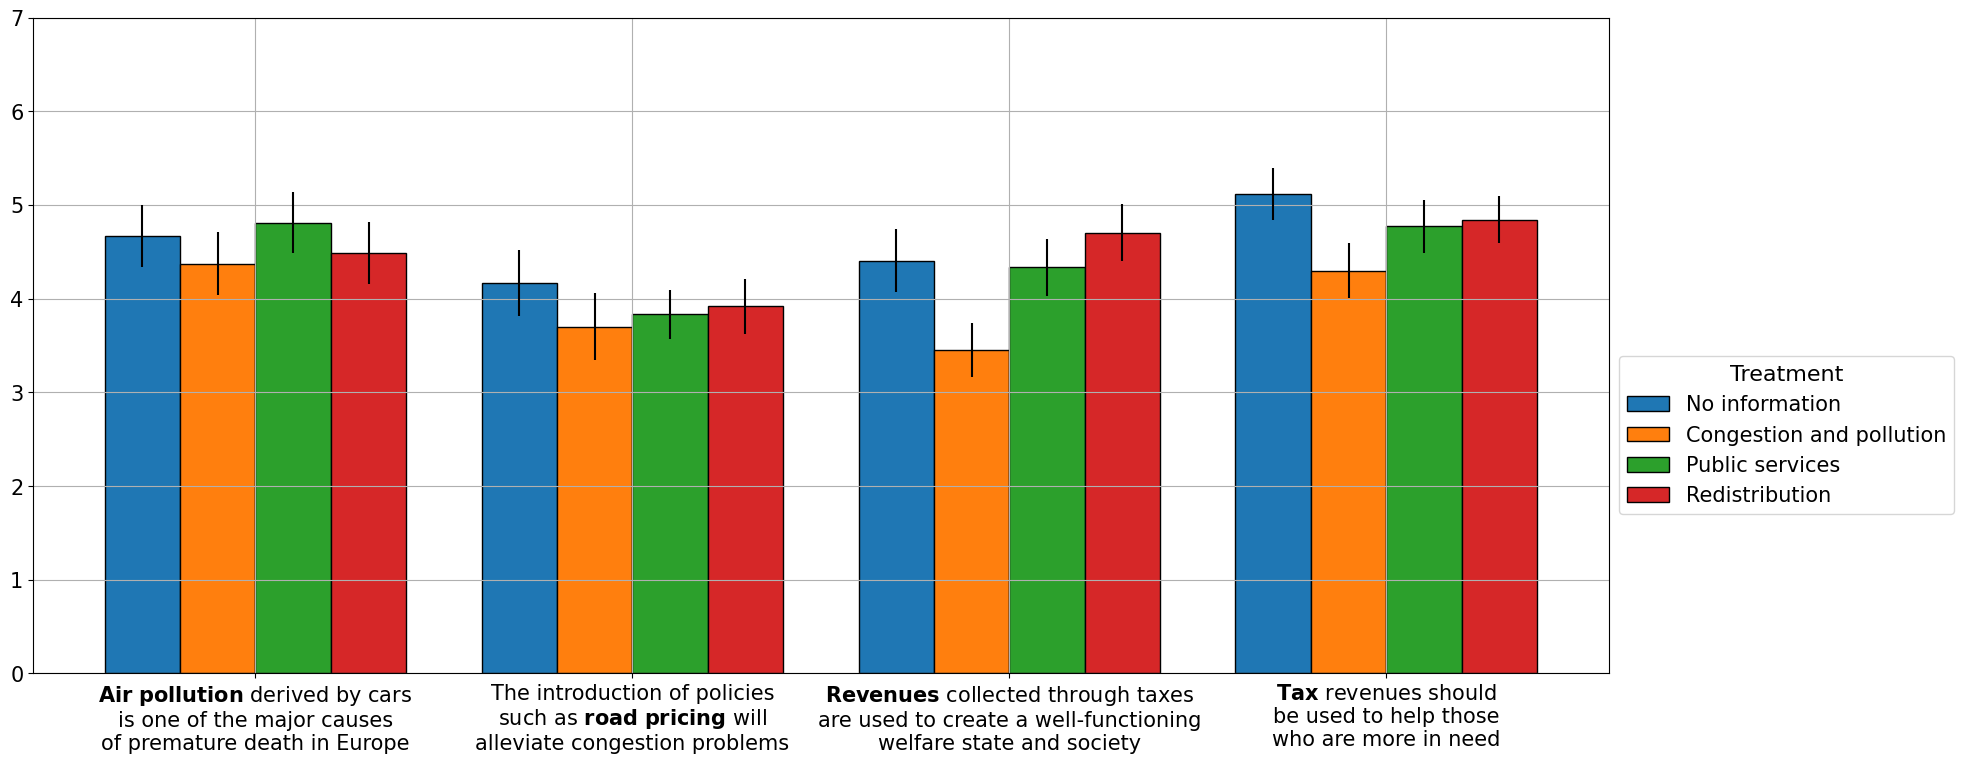

In [9]:
fig=plt.figure(figsize=(20,8))
ind = np.arange(4)
width = 0.2

plt.bar(ind, bar(a).loc[0][:], yerr=bar(a).loc[1][:], width=width, edgecolor='k', label='No information')
plt.bar(ind+width, bar(b).loc[0][:], yerr=bar(b).loc[1][:], width=width, edgecolor='k', label='Congestion and pollution')
plt.bar(ind+2*width, bar(c).loc[0][:], yerr=bar(c).loc[1][:], width=width, edgecolor='k', label='Public services')
plt.bar(ind+3*width, bar(d).loc[0][:], yerr=bar(d).loc[1][:], width=width, edgecolor='k', label='Redistribution')

plt.xticks([r + width*3/2 for r in range(4)], d.columns[[238,240,242,244]], fontsize=15)
plt.yticks(fontsize=15)
#plt.xlabel('Expectations', fontsize=15)
#plt.ylabel('Conditional choice', fontsize=15)
plt.ylim([0,7])
leg=plt.legend(loc='best', bbox_to_anchor=(1, 0.5),fontsize=15)
leg.set_title('Treatment',prop={'size':16})
plt.tight_layout(pad=2,w_pad=8, h_pad=3)
plt.grid()
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\agree.png')

plt.show()